In [44]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn import model_selection
from scipy.stats import randint
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set_style("dark")
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [2]:
data = pd.read_csv('data.csv')
wbcd = pd.read_csv('data.csv')
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.drop(['Unnamed: 32','id'], axis = 1 , inplace=True)

In [5]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
data.size

17639

In [7]:
#Check data missing
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
#Remove duplicates in the dataset
print(data.duplicated().sum())

0


In [11]:
data.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

In [14]:
c = data["diagnosis"].value_counts()
labels = c.index
fig = px.bar(c, title = "Breast Cancer Type", text = c)
fig.show()

Text(0.5, 0.98, 'Correlation Matrix')

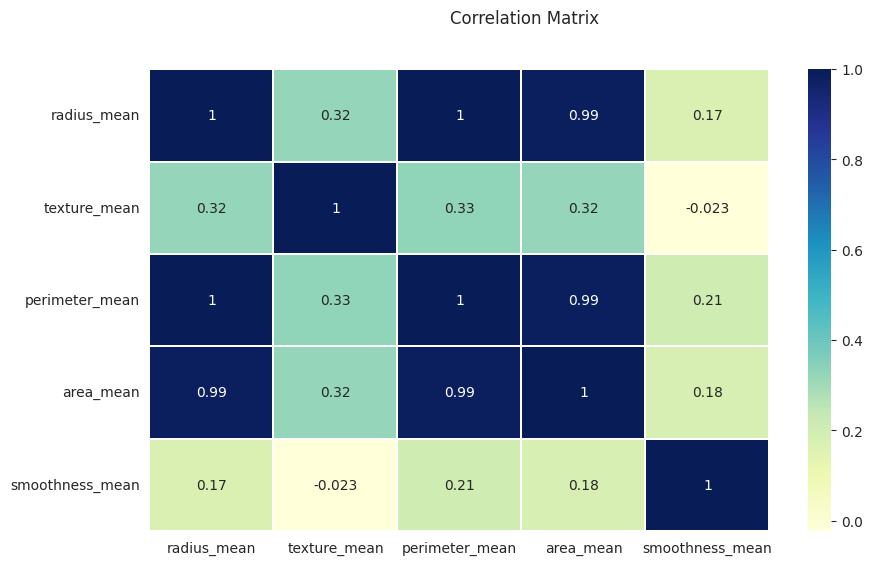

In [15]:
#create the correlation matrix heat map
plt.figure(figsize=(10,6))
sns.heatmap(data[[data.columns[0], data.columns[1],data.columns[2],data.columns[3],
                     data.columns[4], data.columns[5]]].corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
plt.suptitle('Correlation Matrix')

In [16]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

#Scalling
scaler =MinMaxScaler(feature_range=(0, 1))
scaled_data =  pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Split the data to train and test sets
X = scaled_data.loc[:, scaled_data.columns != 'diagnosis']
y = scaled_data['diagnosis']

In [17]:
countNoDisease = len(data[data.diagnosis == 1])
countHaveDisease = len(data[data.diagnosis == 0])
print("Percentage of Patients Having Malignant Breast Cancer: {:.2f}%".format((countNoDisease / (len(data.diagnosis))*100)))
print("Percentage of Patients Having Benign Breast Cancer: {:.2f}%".format((countHaveDisease / (len(data.diagnosis))*100)))

Percentage of Patients Having Malignant Breast Cancer: 37.26%
Percentage of Patients Having Benign Breast Cancer: 62.74%


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [83]:
y_train = y_train.reset_index(drop=True)

**PCA**

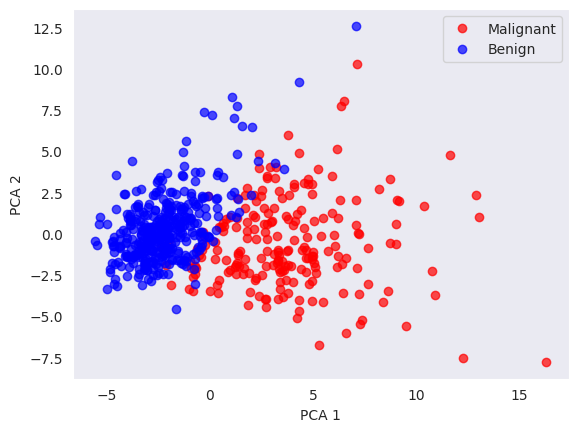

In [19]:
sc = StandardScaler()
X_s = sc.fit_transform(X)

pca = PCA(n_components = 10)
X_pca = pca.fit_transform(X_s)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][data.diagnosis == 1],PCA_df['PCA_2'][data.diagnosis == 1],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.diagnosis == 0],PCA_df['PCA_2'][data.diagnosis == 0],'o', alpha = 0.7, color = 'b')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(['Malignant','Benign'])
plt.show()

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [29]:
# @title Importing Model Libraries
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

**K Nearest Neighbors**


In [58]:
def k_value(i):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  test_predict = knn.predict(X_test)
  print ("Accuracy = ", metrics.accuracy_score(y_test, test_predict))

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
test_predict = knn.predict(X_test)
print ("Accuracy = ", metrics.accuracy_score(y_test, test_predict))


Accuracy =  0.9473684210526315


In [60]:
##Determining the K value for KNN
for i in range(20):
  if i % 2 != 0:
    print("i= ", i)
    k_value(i)

i=  1
Accuracy =  0.9385964912280702
i=  3
Accuracy =  0.9473684210526315
i=  5
Accuracy =  0.956140350877193
i=  7
Accuracy =  0.9473684210526315
i=  9
Accuracy =  0.956140350877193
i=  11
Accuracy =  0.956140350877193
i=  13
Accuracy =  0.956140350877193
i=  15
Accuracy =  0.956140350877193
i=  17
Accuracy =  0.9473684210526315
i=  19
Accuracy =  0.9473684210526315


**KNN From Scratch**

In [86]:
from collections import Counter
# Define the KNN algorithm
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [87]:
def knn(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, x_train) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])
    return predictions


In [88]:
# Predict and evaluate
k = 5  # you can change k value
predictions = knn(X_train, y_train, X_test, k)
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.956140350877193


**SVM**

In [61]:
SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification
SVM_model.fit(X_train, y_train)
test_prediction = SVM_model.predict(X_test)
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, test_prediction))

Accuracy =  0.9649122807017544


**Random Forest**

In [62]:
def RF_n_Estimator(n):
  RF_model = RandomForestClassifier(n_estimators = n, random_state = 42)
  RF_model.fit(X_train, y_train)
  test_prediction_rf = RF_model.predict(X_test)
  print ("Accuracy = ", metrics.accuracy_score(y_test, test_prediction_rf))

In [63]:
n = [100, 500, 1000, 1500, 2000, 2500]
for i in n:
  print("i=", i)
  RF_n_Estimator(i)

i= 100
Accuracy =  0.9473684210526315
i= 500
Accuracy =  0.9473684210526315
i= 1000
Accuracy =  0.9473684210526315
i= 1500
Accuracy =  0.9473684210526315
i= 2000
Accuracy =  0.9473684210526315
i= 2500
Accuracy =  0.9473684210526315


In [64]:
RF_model = RandomForestClassifier(n_estimators = 500, random_state = 42)
RF_model.fit(X_train, y_train)
test_prediction_rf = RF_model.predict(X_test)
print ("Accuracy = ", metrics.accuracy_score(y_test, test_prediction_rf))

Accuracy =  0.9473684210526315


In [37]:
# @title Random Forest(Hyperparameter Tuning)
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
rf_model = GridSearchCV(RandomForestClassifier(random_state=42),param_grid=param_grid)
rf_model.fit(X_train, y_train.ravel())

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [38]:
print(rf_model.best_estimator_)

RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=25,
                       random_state=42)


In [39]:
rf_predict_train = rf_model.predict(X_train)

#get accuracy
rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 0.9670


In [40]:
rf_predict_test = rf_model.predict(X_test)

#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

Accuracy: 0.9298


In [41]:
print ("Confusion Matrix for Random Forest")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))

Confusion Matrix for Random Forest
[[38  5]
 [ 3 68]]

Classification Report

              precision    recall  f1-score   support

           1       0.93      0.88      0.90        43
           0       0.93      0.96      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



**Decision Tree**


In [65]:
def max_depth_estimator(d):
  dt = DecisionTreeClassifier(max_depth = d, random_state = 42)
  dt.fit(X_train, y_train)
  test_prediction_dt = dt.predict(X_test)
  print ("Accuracy = ", metrics.accuracy_score(y_test, test_prediction_dt))

In [66]:
## estimating depth
for i in range(10):
  if(i != 0):
    print("i=", i)
    max_depth_estimator(i)

i= 1
Accuracy =  0.9649122807017544
i= 2
Accuracy =  0.956140350877193
i= 3
Accuracy =  0.956140350877193
i= 4
Accuracy =  0.9649122807017544
i= 5
Accuracy =  0.9385964912280702
i= 6
Accuracy =  0.9385964912280702
i= 7
Accuracy =  0.9473684210526315
i= 8
Accuracy =  0.9473684210526315
i= 9
Accuracy =  0.9473684210526315


In [67]:
dt = DecisionTreeClassifier(max_depth = 4, random_state = 42)
dt.fit(X_train, y_train)
test_prediction_dt = dt.predict(X_test)
print ("Accuracy = ", metrics.accuracy_score(y_test, test_prediction_dt))

Accuracy =  0.9649122807017544


**Decision Tree (HyperParameter Tuning)**

In [50]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
dt_model = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_dist, cv = 5)
dt_model.fit(X_train, y_train.ravel())

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x792fcc8e0e80>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x792fcc8e1060>})

In [51]:
print("Tuned Decision Tree Parameters: {}".format(dt_model.best_params_))
print("Best score is {}".format(dt_model.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 4}
Best score is 0.9340659340659341


In [52]:
from sklearn import metrics
prediction_from_trained_data = dt_model.predict(X_train)
accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our DT model is : {0:.4f}".format(accuracy))

Accuracy of our DT model is : 0.9626


In [53]:
dt_predict_test = dt_model.predict(X_test)

#get accuracy
dt_accuracy_testdata = metrics.accuracy_score(y_test, dt_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(dt_accuracy_testdata))

Accuracy: 0.9474


In [54]:
print ("Confusion Matrix for DT")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, dt_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, dt_predict_test, labels=[ 1,0])))


Confusion Matrix for DT
[[41  2]
 [ 4 67]]

Classification Report

              precision    recall  f1-score   support

           1       0.91      0.95      0.93        43
           0       0.97      0.94      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



**Gradient Boosting**

In [68]:
def GBC_n_Estimator(n,d):
  GBBo = GradientBoostingClassifier(n_estimators=n, learning_rate=1.0, max_depth=d, random_state=0).fit(X_train, y_train)
  test_prediction_GBBo = GBBo.predict(X_test)
  print ("Accuracy = ", metrics.accuracy_score(y_test, test_prediction_GBBo))

In [69]:
## Estimating n_estimators for Gradient Boosting
n = [100, 500, 1000, 1500, 2000, 2500]
for i in n:
  print("n=", i)
  for j in range(1,10):
    if(i != 0):
      print("d=", j)
      GBC_n_Estimator(i,j)


n= 100
d= 1
Accuracy =  0.9473684210526315
d= 2
Accuracy =  0.9649122807017544
d= 3
Accuracy =  0.956140350877193
d= 4
Accuracy =  0.9736842105263158
d= 5
Accuracy =  0.9736842105263158
d= 6
Accuracy =  0.9649122807017544
d= 7
Accuracy =  0.9649122807017544
d= 8
Accuracy =  0.956140350877193
d= 9
Accuracy =  0.956140350877193
n= 500
d= 1
Accuracy =  0.9473684210526315
d= 2
Accuracy =  0.9736842105263158
d= 3
Accuracy =  0.956140350877193
d= 4
Accuracy =  0.9736842105263158
d= 5
Accuracy =  0.9736842105263158
d= 6
Accuracy =  0.9649122807017544
d= 7
Accuracy =  0.9649122807017544
d= 8
Accuracy =  0.956140350877193
d= 9
Accuracy =  0.956140350877193
n= 1000
d= 1
Accuracy =  0.9473684210526315
d= 2
Accuracy =  0.9736842105263158
d= 3
Accuracy =  0.956140350877193
d= 4
Accuracy =  0.9736842105263158
d= 5
Accuracy =  0.9736842105263158
d= 6
Accuracy =  0.9649122807017544
d= 7
Accuracy =  0.9649122807017544
d= 8
Accuracy =  0.956140350877193
d= 9
Accuracy =  0.956140350877193
n= 1500
d= 1
Ac

In [78]:
GBBo = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=5, random_state=0).fit(X_train, y_train)
test_prediction_GBBo = GBBo.predict(X_test)
print ("Accuracy = ", metrics.accuracy_score(y_test, test_prediction_GBBo))

Accuracy =  0.9736842105263158


**MLP**

In [70]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
test_prediction_mlp = mlp.predict(X_test)
print ("Accuracy = ", metrics.accuracy_score(y_test, test_prediction_mlp))

Accuracy =  0.9736842105263158


**Results**

In [71]:
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

In [90]:
data = {
                'Random Forest': test_prediction_rf,
                'Tuned Random Forest' : rf_predict_test,
                'SVM': test_prediction,
                'KNN': test_predict,
                'KNN From Scratch': predictions,
                'MLP': test_prediction_mlp,
                'Gradient Boosting': test_prediction_GBBo,
                'Decision Tree': test_prediction_dt,
                'Tuned DT': dt_predict_test
        }

models = pd.DataFrame(data)
model_results1=pd.DataFrame()
for column in models:
    CM=confusion_matrix(y_test,models[column])

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)

    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])


    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])
    model_results1 = model_results1.append(results, ignore_index = True)

model_results1

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,Random Forest,0.947368,0.930233,0.930233,0.957746,0.930233,0.943990
1,Tuned Random Forest,0.929825,0.926829,0.883721,0.957746,0.904762,0.920734
2,SVM,0.964912,0.953488,0.953488,0.971831,0.953488,0.962660
3,KNN,0.947368,0.930233,0.930233,0.957746,0.930233,0.943990
4,KNN From Scratch,0.956140,0.952381,0.930233,0.971831,0.941176,0.951032
5,MLP,0.973684,0.954545,0.976744,0.971831,0.965517,0.974288
6,Gradient Boosting,0.973684,0.954545,0.976744,0.971831,0.965517,0.974288
7,Decision Tree,0.964912,0.953488,0.953488,0.971831,0.953488,0.962660
8,Tuned DT,0.947368,0.911111,0.953488,0.943662,0.931818,0.948575
